In [1]:
# import the required packages
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
import sklearn.svm as svm
import xgboost as xg

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
data = pd.read_csv('hr_data_new.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            8658 non-null   int64  
 1   region                8658 non-null   int64  
 2   education             8658 non-null   int64  
 3   gender                8658 non-null   int64  
 4   recruitment_channel   8658 non-null   int64  
 5   no_of_trainings       8658 non-null   int64  
 6   age                   8658 non-null   int64  
 7   previous_year_rating  8658 non-null   float64
 8   length_of_service     8658 non-null   int64  
 9   KPIs_met >80%         8658 non-null   int64  
 10  awards_won?           8658 non-null   int64  
 11  avg_training_score    8658 non-null   int64  
 12  is_promoted           8658 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 879.5 KB


In [4]:
data["department"] = (data["department"] - data["department"].min()) / (data["department"].max()-data["department"].min())
data["region"] = (data["region"] - data["region"].min()) / (data["region"].max()-data["region"].min())
data["education"] = (data["education"] - data["education"].min()) / (data["education"].max()-data["education"].min())
data["recruitment_channel"] = (data["recruitment_channel"] - data["recruitment_channel"].min()) / (data["recruitment_channel"].max()-data["recruitment_channel"].min())
data["no_of_trainings"] = (data["no_of_trainings"] - data["no_of_trainings"].min()) / (data["no_of_trainings"].max()-data["no_of_trainings"].min())
data["age"] = (data["age"] - data["age"].min()) / (data["age"].max()-data["age"].min())
data["previous_year_rating"] = (data["previous_year_rating"] - data["previous_year_rating"].min()) / (data["previous_year_rating"].max()-data["previous_year_rating"].min())
data["length_of_service"] = (data["length_of_service"] - data["length_of_service"].min()) / (data["length_of_service"].max()-data["length_of_service"].min())
data["avg_training_score"] = (data["avg_training_score"] - data["avg_training_score"].min()) / (data["avg_training_score"].max()-data["avg_training_score"].min())

In [5]:
hr_y = data['is_promoted']
hr_x = data.drop(['is_promoted'], axis=1)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(hr_x, hr_y, test_size=0.33, random_state = 7)

In [7]:
hr_x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.000,0.181818,0.5,0,0.5,0.0,0.375,1.00,0.060606,1,0,0.183333
1,1.000,0.818182,0.5,1,0.5,0.0,0.325,1.00,0.151515,1,0,0.200000
2,1.000,0.090909,1.0,1,0.0,0.0,0.750,0.75,0.484848,1,0,0.133333
3,0.500,0.909091,0.5,1,0.0,0.0,0.250,0.50,0.181818,1,0,0.750000
4,0.625,0.636364,1.0,1,0.0,0.0,0.350,1.00,0.181818,1,0,0.650000


### 1.2 Build the Model(s)

### Decision Tree Classifier

In [8]:
dt = DecisionTreeClassifier(random_state=3)
dt.fit(x_train,y_train)

results  = cross_validate(dt, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.99985562 1.         1.         0.99985564 0.99985564]
test_score:  [0.76385681 0.7817552  0.77713626 0.77354131 0.74812247]
cross val training accuracy is: 0.9999133782479145
cross val testing accuracy is: 0.768882409212259


### Random Forest Classifier

In [9]:
rf = RandomForestClassifier(random_state=3)
rf.fit(x_train,y_train)

results  = cross_validate(rf, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.99985562 1.         1.         0.99985564 0.99985564]
test_score:  [0.80196305 0.81466513 0.80023095 0.80704795 0.77642981]
cross val training accuracy is: 0.9999133782479145
cross val testing accuracy is: 0.8000673761845867


### Support Vector Classifier

In [10]:
svc = svm.SVC(random_state=3)
svc.fit(x_train, y_train)

results  = cross_validate(svc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.79324285 0.7919434  0.79122148 0.79240653 0.80034647]
test_score:  [0.78406467 0.80946882 0.80138568 0.79607163 0.76256499]
cross val training accuracy is: 0.7938321468958843
cross val testing accuracy is: 0.7907111589637676


### Logistic Regression

In [11]:
lg = LogisticRegression(max_iter = 100, random_state=3)
lg.fit(x_train,y_train)

results  = cross_validate(lg, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.74444124 0.74270863 0.74256425 0.74548867 0.7480872 ]
test_score:  [0.7448037  0.75404157 0.75461894 0.73772386 0.73483536]
cross val training accuracy is: 0.7446579966542718
cross val testing accuracy is: 0.745204683512047


### XGBoost Classifier

In [12]:
xgc = xg.XGBClassifier(use_label_encoder=False,disable_default_eval_metric=1, random_state=3)
xgc.fit(x_train,y_train)

results  = cross_validate(xgc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.93950332 0.93805949 0.93935894 0.93936769 0.9400895 ]
test_score:  [0.81293303 0.80889145 0.8169746  0.81109185 0.79549393]
cross val training accuracy is: 0.9392757881260042
cross val testing accuracy is: 0.8090769729547993


### XGBoost Random Forest Classifier

In [13]:
xgrfc = xg.XGBRFClassifier(use_label_encoder=False,disable_default_eval_metric=1, random_state=3)
xgrfc.fit(x_train,y_train)

results  = cross_validate(xgrfc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.79685244 0.79468669 0.79598614 0.79543814 0.80381117]
test_score:  [0.79445727 0.79503464 0.80080831 0.79491623 0.768342  ]
cross val training accuracy is: 0.7973549162773815
cross val testing accuracy is: 0.7907116926365167


### Multi Layer Perception Classifier

In [14]:
mlp = MLPClassifier(max_iter = 200, random_state=3)
mlp.fit(x_train,y_train)

results  = cross_validate(mlp, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.8085475  0.81042449 0.81648859 0.81521582 0.81969106]
test_score:  [0.79734411 0.78983834 0.81120092 0.79896014 0.77527441]
cross val training accuracy is: 0.8140734938814294
cross val testing accuracy is: 0.7945235836658782


### 1.3 Evaluate and Improve the Model(s)

### Base Model: Voting Classifier (RFC, SVC, MLPC)

In [15]:
rf= RandomForestClassifier(random_state=3)
svc = svm.SVC(probability=True)
mlp = MLPClassifier(random_state=3)

In [16]:
evc = VotingClassifier(estimators = [('rf',rf),('svc',svc), ('mlp',mlp)], voting = 'soft')
evc.fit(x_train,y_train)

results  = cross_validate(evc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.88478198 0.882905   0.8855039  0.88624224 0.87498195]
test_score:  [0.80023095 0.81524249 0.81351039 0.81051415 0.78047371]
cross val training accuracy is: 0.8828830140284385
cross val testing accuracy is: 0.8039943404004948


In [17]:
evc = VotingClassifier(estimators = [('rf',rf),('svc',svc), ('mlp',mlp)], voting = 'hard')
evc.fit(x_train,y_train)

results  = cross_validate(evc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.85128501 0.84796419 0.84753104 0.84423271 0.84250036]
test_score:  [0.79561201 0.80946882 0.81408776 0.80300404 0.77585211]
cross val training accuracy is: 0.8467026643640347
cross val testing accuracy is: 0.7996049487474034


### Model 1: Random Forest Classifier

In [18]:
rf = RandomForestClassifier(max_features='auto', random_state=3, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [1, 10, 100], 
              "min_samples_leaf" : [1, 2, 3], 
              "n_estimators": [1, 10, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, 
                  scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.8051486745570182
{'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 2, 'n_estimators': 100}


In [19]:
rf = RandomForestClassifier(max_features='auto', random_state=3, 
                            n_jobs=-1, criterion = 'entropy')

param_grid = {"max_depth": [50, 100, 150], 
              "min_samples_leaf" : [2, 10, 20], 
              "n_estimators": [50, 100, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, 
                  scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.8051486745570182
{'max_depth': 50, 'min_samples_leaf': 2, 'n_estimators': 100}


In [20]:
rf = RandomForestClassifier(max_features='auto', random_state=3, 
                            n_jobs=-1, criterion = 'entropy', 
                            min_samples_leaf = 2)

param_grid = { "max_depth": [25, 50, 75],
              "n_estimators": [50, 75, 100, 125, 150]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, 
                  scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.8073438707017664
{'max_depth': 25, 'n_estimators': 100}


### RFC Max_Depth Tune (First iteration)

In [21]:
depth_range = range(15,36)

train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in depth_range:
    # Create Random Forest Model
    rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=d,
                             min_samples_leaf=2,
                             max_features='auto',                             
                             random_state=3,
                             n_jobs=-1)

    rf.fit(x_train,y_train)
    train_acc.append(rf.score(x_train,y_train))
    test_acc.append(rf.score(x_test,y_test))
    
    results  = cross_validate(rf, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))


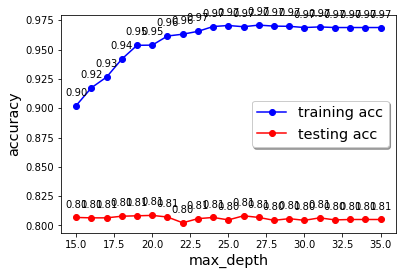

In [22]:
plt.plot(depth_range, train_acc, 'bo-', label ='training acc')
plt.plot(depth_range, test_acc, 'ro-', label = 'testing acc')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

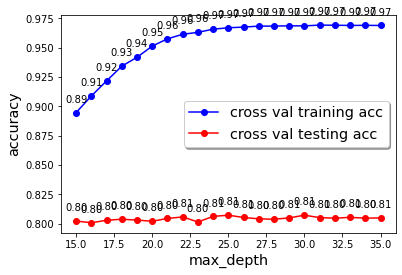

In [23]:
plt.plot(depth_range, cross_val_train_acc, 'bo-', label ='cross val training acc')
plt.plot(depth_range, cross_val_test_acc, 'ro-', label = 'cross val testing acc')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,cross_val_train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,cross_val_test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

### RFC Max_Depth Tune (Second iteration)

In [24]:
depth_range = range(5,15)

train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in depth_range:
    # Create Random Forest Model
    rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=d,
                             min_samples_leaf=2,
                             max_features='auto',                             
                             random_state=3,
                             n_jobs=-1)

    rf.fit(x_train,y_train)
    train_acc.append(rf.score(x_train,y_train))
    test_acc.append(rf.score(x_test,y_test))
    
    results  = cross_validate(rf, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))


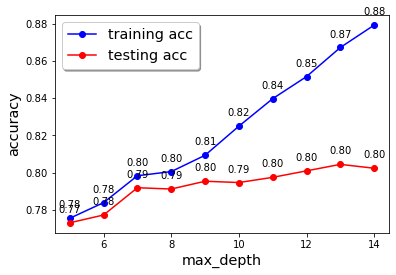

In [25]:
plt.plot(depth_range, train_acc, 'bo-', label ='training acc')
plt.plot(depth_range, test_acc, 'ro-', label = 'testing acc')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

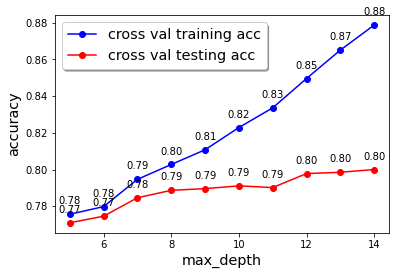

In [26]:
plt.plot(depth_range, cross_val_train_acc, 'bo-', label ='cross val training acc')
plt.plot(depth_range, cross_val_test_acc, 'ro-', label = 'cross val testing acc')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,cross_val_train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,cross_val_test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

#### Best score at Depth 9

### RFC N_Estimators Tune

In [27]:
estimators = [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]

train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for e in estimators:
    # Create Random Forest Model
    rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=e,
                             max_depth=9,
                             min_samples_leaf=2,
                             max_features='auto',                             
                             random_state=3,
                             n_jobs=-1)

    rf.fit(x_train,y_train)
    train_acc.append(rf.score(x_train,y_train))
    test_acc.append(rf.score(x_test,y_test))
    
    results  = cross_validate(rf, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))

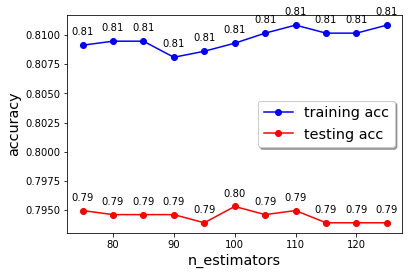

In [28]:
plt.plot(estimators, train_acc, 'bo-', label ='training acc')
plt.plot(estimators, test_acc, 'ro-', label = 'testing acc')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(estimators,train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(estimators,test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

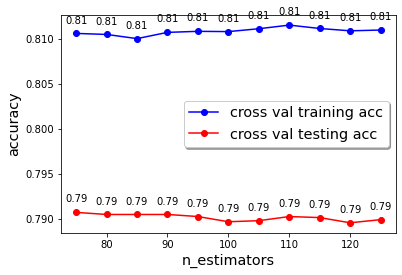

In [29]:
plt.plot(estimators, cross_val_train_acc, 'bo-', label ='cross val training acc')
plt.plot(estimators, cross_val_test_acc, 'ro-', label = 'cross val testing acc')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(estimators,cross_val_train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(estimators,cross_val_test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

#### Best score at N_Estimator 75

### RFC min_samples_leaf Tune

In [30]:
leaves = range(1,6)

train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for l in leaves:
    # Create Random Forest Model
    rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=70,
                             max_depth=9,
                             min_samples_leaf=l,
                             max_features='auto',                             
                             random_state=3,
                             n_jobs=-1)

    rf.fit(x_train,y_train)
    train_acc.append(rf.score(x_train,y_train))
    test_acc.append(rf.score(x_test,y_test))
    
    results  = cross_validate(rf, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))

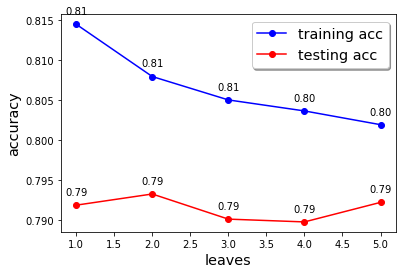

In [31]:
plt.plot(leaves, train_acc, 'bo-', label ='training acc')
plt.plot(leaves, test_acc, 'ro-', label = 'testing acc')

plt.xlabel('leaves', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(leaves,train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(leaves,test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

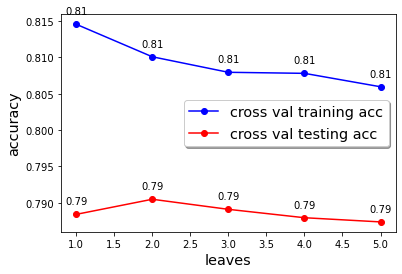

In [32]:
plt.plot(leaves, cross_val_train_acc, 'bo-', label ='cross val training acc')
plt.plot(leaves, cross_val_test_acc, 'ro-', label = 'cross val testing acc')

plt.xlabel('leaves', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(leaves,cross_val_train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(leaves,cross_val_test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [33]:
rf_final = RandomForestClassifier(criterion='entropy', 
                             n_estimators=70,
                             max_depth=9,
                             min_samples_leaf=2,
                             max_features='auto',                             
                             random_state=3,
                             n_jobs=-1)

rf_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_final.score(x_train,y_train))
print('testing acc: ', rf_final.score(x_test,y_test))
results  = cross_validate(rf_final, x_train, y_train, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8079310344827586
testing acc:  0.7932120363890833
cross val training accuracy is: 0.8148706896551724
cross val testing accuracy is: 0.7891379310344828


### Model 2: Support Vector Classifier

In [34]:
param_grid = {'C': [10, 100, 1000], 
              'kernel': ['rbf', 'sigmoid', 'poly']}

gs = GridSearchCV(svm.SVC(random_state=3),param_grid,
                  scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.8030714867989375
{'C': 10, 'kernel': 'rbf'}


In [35]:
param_grid = {'C': [10, 50, 100], 
              'gamma': [1, 0.1, 0.01]}

gs = GridSearchCV(svm.SVC(kernel = 'rbf', random_state=3),param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.802840806753095
{'C': 10, 'gamma': 1}


In [36]:
param_grid = {'C': [5, 10, 20, 50],
              'gamma': [5, 1, 0.1]}

gs = GridSearchCV(svm.SVC(kernel = 'rbf', random_state=3),param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.8029560800669225
{'C': 5, 'gamma': 1}


In [37]:
Cvalue = range(1,11)

train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for c in Cvalue:
    # Create Random Forest Model
    svc = svm.SVC(C=c, kernel = "rbf", gamma = 1, random_state=3)

    svc.fit(x_train,y_train)
    train_acc.append(svc.score(x_train,y_train))
    test_acc.append(svc.score(x_test,y_test))
    
    results  = cross_validate(svc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))

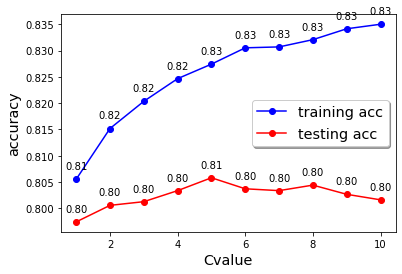

In [38]:
plt.plot(Cvalue, train_acc, 'bo-', label ='training acc')
plt.plot(Cvalue, test_acc, 'ro-', label = 'testing acc')

plt.xlabel('Cvalue', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(Cvalue,train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(Cvalue,test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

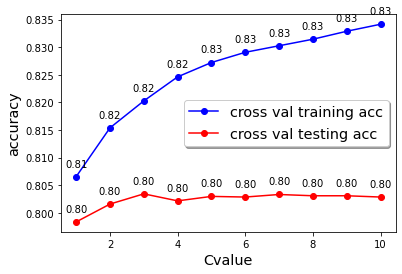

In [39]:
plt.plot(Cvalue, cross_val_train_acc, 'bo-', label ='cross val training acc')
plt.plot(Cvalue, cross_val_test_acc, 'ro-', label = 'cross val testing acc')

plt.xlabel('Cvalue', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(Cvalue,cross_val_train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(Cvalue,cross_val_test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [40]:
gvalue = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]

train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for g in gvalue:
    # Create Random Forest Model
    svc = svm.SVC(C=3, kernel = "rbf", gamma = g)

    svc.fit(x_train,y_train)
    train_acc.append(svc.score(x_train,y_train))
    test_acc.append(svc.score(x_test,y_test))
    
    results  = cross_validate(svc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))

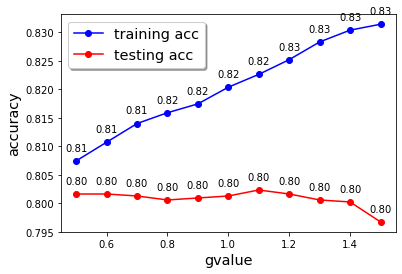

In [41]:
plt.plot(gvalue, train_acc, 'bo-', label ='training acc')
plt.plot(gvalue, test_acc, 'ro-', label = 'testing acc')

plt.xlabel('gvalue', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(gvalue,train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(gvalue,test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

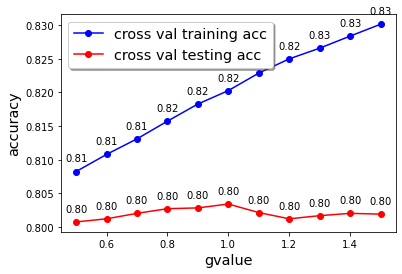

In [42]:
plt.plot(gvalue, cross_val_train_acc, 'bo-', label ='cross val training acc')
plt.plot(gvalue, cross_val_test_acc, 'ro-', label = 'cross val testing acc')

plt.xlabel('gvalue', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(gvalue,cross_val_train_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(gvalue,cross_val_test_acc): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [43]:
svc_final = svm.SVC(C = 3, kernel = 'rbf', gamma = 1, random_state=3)

svc_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', svc_final.score(x_train,y_train))
print('testing acc: ', svc_final.score(x_test,y_test))
results  = cross_validate(svc_final, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8203448275862069
testing acc:  0.801259622113366
cross val training accuracy is: 0.820252948522484
cross val testing accuracy is: 0.8034176402858885


### Model 3: Multi Layer Perception Classifier

In [44]:
param_grid = {'hidden_layer_sizes': [(50,25), (30,15), (10,5)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'max_iter': [100, 200, 500, 1000]}

gs = GridSearchCV(MLPClassifier(random_state=3),param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.811270901626768
{'activation': 'tanh', 'hidden_layer_sizes': (50, 25), 'max_iter': 200, 'solver': 'adam'}


In [45]:
param_grid = {'hidden_layer_sizes': [(70,35,7), (70,35), 
                                     (50,25,5), (50,25), 
                                     (30,15,3), (30,15)]}

gs = GridSearchCV(MLPClassifier(activation = 'tanh', solver = 'adam', 
                                max_iter = 200, random_state=3),
                                param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(hr_x, hr_y)

print(gs.best_score_)
print(gs.best_params_)

0.811270901626768
{'hidden_layer_sizes': (50, 25)}


In [46]:
mlpc_final = MLPClassifier(max_iter = 200, activation= 'tanh', 
                           hidden_layer_sizes = (50, 25), solver = 'adam',
                           random_state=3)
mlpc_final.fit(x_train,y_train)

results  = cross_validate(mlpc_final, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.81966503 0.81432284 0.81374531 0.81550455 0.82387758]
test_score:  [0.80600462 0.81408776 0.83025404 0.81571346 0.79029463]
cross val training accuracy is: 0.8174230614459166
cross val testing accuracy is: 0.811270901626768


### Final Model: Voting Classifier (RFC, SVC, MLPC)

In [47]:
rf_final = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=9,
                             min_samples_leaf=2,
                             max_features='auto',                             
                             random_state=3)
svc_final = svm.SVC(C = 3, kernel = 'rbf', gamma = 1, random_state=3, probability=True)
mlp_final = MLPClassifier(max_iter = 200, activation= 'tanh', hidden_layer_sizes = (50, 25), solver = 'adam',random_state=3)

In [48]:
evc = VotingClassifier(estimators = [('rf_final',rf_final),('svc_final',svc_final), ('mlp_final',mlp_final)], voting = 'soft')
evc.fit(x_train,y_train)

results  = cross_validate(evc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.82876119 0.82616229 0.82616229 0.82344449 0.82835282]
test_score:  [0.80831409 0.81755196 0.81581986 0.81975737 0.79145003]
cross val training accuracy is: 0.8265766157287077
cross val testing accuracy is: 0.8105786613619597


In [49]:
evc = VotingClassifier(estimators = [('rf_final',rf_final),('svc_final',svc_final), ('mlp_final',mlp_final)], voting = 'hard')
evc.fit(x_train,y_train)

results  = cross_validate(evc, hr_x, hr_y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

train_score:  [0.82529599 0.82399653 0.82197517 0.82142342 0.82719792]
test_score:  [0.80773672 0.81639723 0.8169746  0.81802426 0.79029463]
cross val training accuracy is: 0.8239778047549293
cross val testing accuracy is: 0.80988548716984


## 2. Airbnb Singapore

### 2.1 Load and Sample the data

In [50]:
data = pd.read_csv('listings_new.csv')

In [51]:
data = data.drop(['latitude', 'longitude'], axis=1)


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6023 entries, 0 to 6022
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6023 non-null   int64  
 1   room_type                       6023 non-null   int64  
 2   price                           6023 non-null   int64  
 3   minimum_nights                  6023 non-null   int64  
 4   number_of_reviews               6023 non-null   int64  
 5   last_review                     6023 non-null   int64  
 6   reviews_per_month               6023 non-null   float64
 7   calculated_host_listings_count  6023 non-null   int64  
 8   availability_365                6023 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 423.6 KB


In [53]:
data["neighbourhood"] = (data["neighbourhood"] - data["neighbourhood"].min()) / (data["neighbourhood"].max()-data["neighbourhood"].min())
data["room_type"] = (data["room_type"] - data["room_type"].min()) / (data["room_type"].max()-data["room_type"].min())
data["minimum_nights"] = (data["minimum_nights"] - data["minimum_nights"].min()) / (data["minimum_nights"].max()-data["minimum_nights"].min())
data["number_of_reviews"] = (data["number_of_reviews"] - data["number_of_reviews"].min()) / (data["number_of_reviews"].max()-data["number_of_reviews"].min())
data["reviews_per_month"] = (data["reviews_per_month"] - data["reviews_per_month"].min()) / (data["reviews_per_month"].max()-data["reviews_per_month"].min())
data["calculated_host_listings_count"] = (data["calculated_host_listings_count"] - data["calculated_host_listings_count"].min()) / (data["calculated_host_listings_count"].max()-data["calculated_host_listings_count"].min())
data["availability_365"] = (data["availability_365"] - data["availability_365"].min()) / (data["availability_365"].max()-data["availability_365"].min())


In [54]:
air_y = data['price']
air_x = data.drop(['price'], axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(air_x, air_y, test_size=0.33, random_state = 7)

### 2.2 Build the Model(s)

In [56]:
dtr = DecisionTreeRegressor(random_state=3)
dtr.fit(x_train,y_train)

results  = cross_validate(dtr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-11.95405356 -12.6393622  -13.2984281  -12.97236672 -11.55328678]
test_score:  [-76.78693057 -80.69007688 -80.35699486 -84.2427447  -93.54431084]
cross val training mean_squared_error is: 12.483499473089845
cross val testing mean_squared_error is: 83.12421156828195


In [57]:
rfr = RandomForestRegressor(random_state=3)
rfr.fit(x_train,y_train)

results  = cross_validate(rfr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-22.49968485 -22.81524975 -23.20754269 -23.01269633 -22.11049598]
test_score:  [-56.95051363 -58.66260587 -59.59610952 -64.76634755 -67.14939069]
cross val training root_mean_squared_error is: 22.72913392092019
cross val testing root_mean_squared_error is: 61.42499345125672


In [58]:
svr = svm.SVR()
svr.fit(x_train,y_train)

results  = cross_validate(svr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-73.83475662 -72.5841857  -72.35539325 -70.89259494 -71.74136936]
test_score:  [-62.79744018 -70.23636793 -76.23620655 -76.21335216 -78.54436506]
cross val training root_mean_squared_error is: 72.28165997388479
cross val testing root_mean_squared_error is: 72.805546376705


In [59]:
lr = LinearRegression()
lr.fit(x_train,y_train)

results  = cross_validate(lr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-68.83345656 -67.76659716 -67.29935983 -66.24621187 -66.94122391]
test_score:  [-62.35286498 -66.57680969 -68.36071799 -72.35485624 -69.7157739 ]
cross val training root_mean_squared_error is: 67.41736986373513
cross val testing root_mean_squared_error is: 67.87220455994405


In [60]:
xgr = xg.XGBRegressor(random_state=3)
xgr.fit(x_train,y_train)

results  = cross_validate(xgr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-28.75447347 -28.71583368 -29.48730924 -28.90124462 -28.48627428]
test_score:  [-63.56574966 -60.03619729 -59.15663505 -64.89920614 -66.80545413]
cross val training root_mean_squared_error is: 28.8690270577641
cross val testing root_mean_squared_error is: 62.892648456420694


### Multi Layer Perception Regressor

In [61]:
mlpr = MLPRegressor(random_state=3)
mlpr.fit(x_train,y_train)

results  = cross_validate(mlpr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])
print('cross val training root_mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing root_mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

train_score:  [-68.86988609 -67.84226694 -67.330111   -66.1225676  -67.02498979]
test_score:  [-61.90856701 -66.34257268 -68.49812191 -72.26025602 -70.15303121]
cross val training root_mean_squared_error is: 67.43796428635012
cross val testing root_mean_squared_error is: 67.832509765826


### 2.3 Evaluate and Improve the Model(s)

In [62]:
rfr = RandomForestRegressor(criterion= 'mse', random_state=3, n_jobs=-1)

param_grid = {"max_depth": [1, 10, 100], 
              "n_estimators": [1, 10, 100]}

gs = GridSearchCV(estimator=rfr, param_grid=param_grid,
                  scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(air_x, air_y)

print(gs.best_score_)
print(gs.best_params_)

-61.202484141448636
{'max_depth': 10, 'n_estimators': 100}


In [63]:
rfr = RandomForestRegressor(criterion= 'mse', random_state=3, n_jobs=-1)

param_grid = {"max_depth": [10, 30, 50], 
              "n_estimators": [50, 75, 100, 125, 150]}

gs = GridSearchCV(estimator=rfr, param_grid=param_grid, 
                  scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(air_x, air_y)

print(gs.best_score_)
print(gs.best_params_)

-61.138353645417695
{'max_depth': 10, 'n_estimators': 150}


In [90]:
depth_range = range(5,16)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in depth_range:
    # Create Random Forest Model
    rfr = RandomForestRegressor(n_estimators=150,
                             max_depth=d,                             
                             random_state=3,
                             n_jobs=-1)

    rfr.fit(x_train,y_train)
    train_rmse.append(sqrt(mean_squared_error(rfr.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rfr.predict(x_test), y_test)))
    
    results  = cross_validate(rfr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))


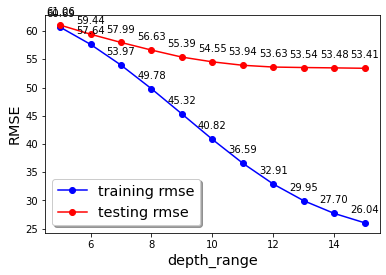

In [91]:
plt.plot(depth_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(depth_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('depth_range', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

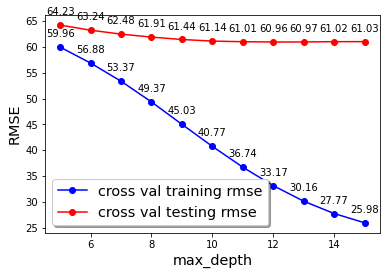

In [92]:
plt.plot(depth_range, cross_val_train_rmse, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test_rmse, 'ro-', label = 'cross val testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,cross_val_train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,cross_val_test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [93]:
depth_range = range(1,11)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in depth_range:
    # Create Random Forest Model
    rfr = RandomForestRegressor(n_estimators=150,
                             max_depth=d,                             
                             random_state=3,
                             n_jobs=-1)

    rfr.fit(x_train,y_train)
    train_rmse.append(sqrt(mean_squared_error(rfr.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rfr.predict(x_test), y_test)))
    
    results  = cross_validate(rfr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

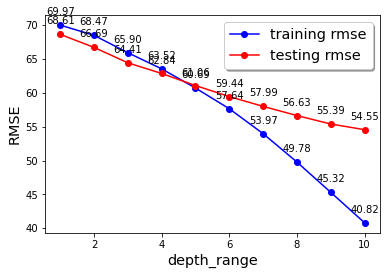

In [94]:
plt.plot(depth_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(depth_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('depth_range', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

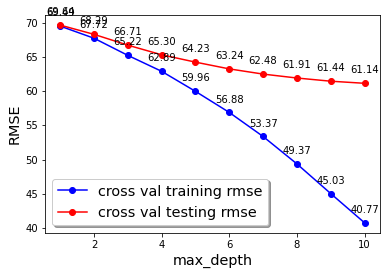

In [95]:
plt.plot(depth_range, cross_val_train_rmse, 'bo-', label ='cross val training rmse')
plt.plot(depth_range, cross_val_test_rmse, 'ro-', label = 'cross val testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth_range,cross_val_train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth_range,cross_val_test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [96]:
estimators = [125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for e in estimators:
    # Create Random Forest Model
    rfr = RandomForestRegressor(n_estimators=e,
                             max_depth=4,                             
                             random_state=3,
                             n_jobs=-1)

    rfr.fit(x_train,y_train)
    train_rmse.append(sqrt(mean_squared_error(rfr.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rfr.predict(x_test), y_test)))
    
    results  = cross_validate(rfr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))


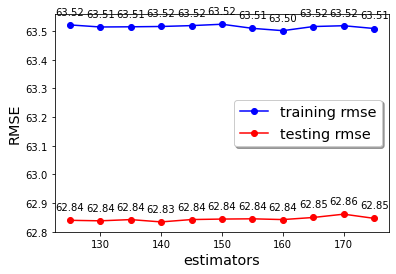

In [97]:
plt.plot(estimators, train_rmse, 'bo-', label ='training rmse')
plt.plot(estimators, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('estimators', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(estimators,train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(estimators,test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

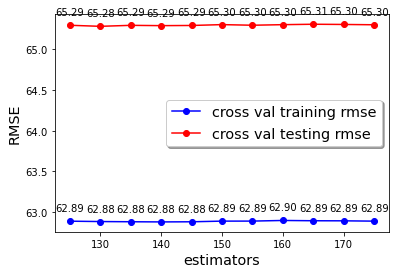

In [98]:
plt.plot(estimators, cross_val_train_rmse, 'bo-', label ='cross val training rmse')
plt.plot(estimators, cross_val_test_rmse, 'ro-', label = 'cross val testing rmse')

plt.xlabel('estimators', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(estimators,cross_val_train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(estimators,cross_val_test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [73]:
rfr_final = RandomForestRegressor(n_estimators=150,
                             max_depth=4,                             
                             random_state=3,
                             n_jobs=-1)

rfr_final.fit(x_train,y_train)

print('training rmse: ', sqrt(mean_squared_error(rfr_final.predict(x_train), y_train)))
print('testing rmse: ', sqrt(mean_squared_error(rfr_final.predict(x_test), y_test)))
results  = cross_validate(rfr_final, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training rmse is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing rmse is:', sum(-results['test_score'])/len(results['test_score']))

training rmse:  63.52322883505525
testing rmse:  62.843979586155186
cross val training rmse is: 62.889456151960346
cross val testing rmse is: 65.30270539298355


In [74]:
xgr = xg.XGBRegressor(random_state=3, n_jobs=-1)

param_grid = {"booster": ['gbtree', 'gblinear', 'dart']}

gs = GridSearchCV(estimator=xgr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(air_x, air_y)

print(gs.best_score_)
print(gs.best_params_)

-62.89264805185403
{'booster': 'dart'}


In [75]:
xgr = xg.XGBRegressor(booster = 'dart', random_state=3, n_jobs=-1)

param_grid = {"max_depth": [5, 10, 50, 100],
              "eta": [0.1, 0.5, 0.9]}

gs = GridSearchCV(estimator=xgr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(air_x, air_y)

print(gs.best_score_)
print(gs.best_params_)

-61.09912176995016
{'eta': 0.1, 'max_depth': 5}


In [76]:
xgr = xg.XGBRegressor(booster = 'dart', random_state=3, n_jobs=-1)

param_grid = {"max_depth": [3 ,5, 7],
              "eta": [0.01, 0.05, 0.1]}

gs = GridSearchCV(estimator=xgr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(air_x, air_y)

print(gs.best_score_)
print(gs.best_params_)

-60.54035198357887
{'eta': 0.05, 'max_depth': 7}


In [99]:
depth = range(1,11)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in depth:
    # Create Random Forest Model
    xgr = xg.XGBRegressor(max_depth = d, 
                          eta = 0.05,
                          booster = 'dart', 
                          random_state=3, 
                          n_jobs=-1)

    xgr.fit(x_train,y_train)
    train_rmse.append(sqrt(mean_squared_error(xgr.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgr.predict(x_test), y_test)))
    
    results  = cross_validate(xgr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))


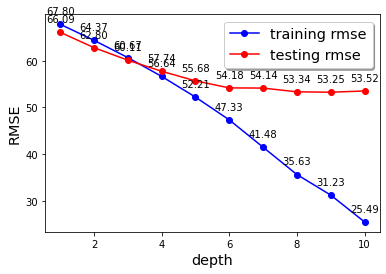

In [100]:
plt.plot(depth, train_rmse, 'bo-', label ='training rmse')
plt.plot(depth, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('depth', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth,train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth,test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

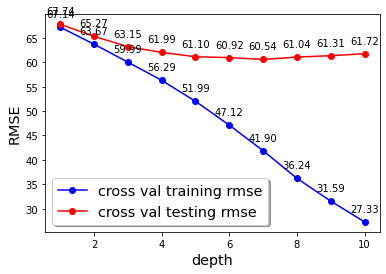

In [101]:
plt.plot(depth, cross_val_train_rmse, 'bo-', label ='cross val training rmse')
plt.plot(depth, cross_val_test_rmse, 'ro-', label = 'cross val testing rmse')

plt.xlabel('depth', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(depth,cross_val_train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(depth,cross_val_test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [102]:
etas = [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for e in etas:
    # Create Random Forest Model
    xgr = xg.XGBRegressor(max_depth = 2, 
                          eta = e,
                          booster = 'dart', 
                          random_state=3, 
                          n_jobs=-1)

    xgr.fit(x_train,y_train)
    train_rmse.append(sqrt(mean_squared_error(xgr.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgr.predict(x_test), y_test)))
    
    results  = cross_validate(xgr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))


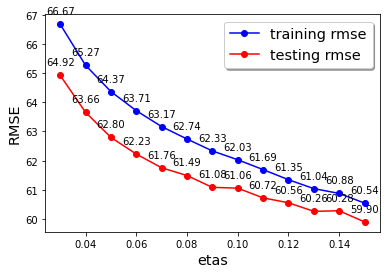

In [103]:
plt.plot(etas, train_rmse, 'bo-', label ='training rmse')
plt.plot(etas, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('etas', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(etas,train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(etas,test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

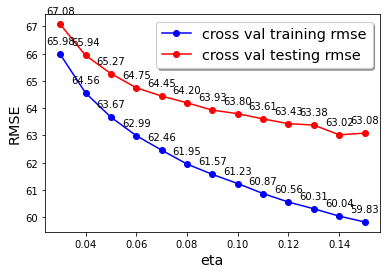

In [104]:
plt.plot(etas, cross_val_train_rmse, 'bo-', label ='cross val training rmse')
plt.plot(etas, cross_val_test_rmse, 'ro-', label = 'cross val testing rmse')

plt.xlabel('eta', fontsize='x-large')
plt.ylabel('RMSE', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')

for x, y in zip(etas,cross_val_train_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x, y in zip(etas,cross_val_test_rmse): # zip joins x and y coordinates in pairs

    label = "{:.2f}".format(y) # value of data label to display

    plt.annotate(label, # this is data label to display
                 (x,y), # this is the position to insert the data label
                 textcoords="offset points", # define how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [83]:
xgr_final = xg.XGBRegressor(max_depth = 2, 
                          eta = 0.08,
                          booster = 'dart', 
                          random_state=3, 
                          n_jobs=-1)

xgr_final.fit(x_train,y_train)

print('training rmse: ', sqrt(mean_squared_error(xgr_final.predict(x_train), y_train)))
print('testing rmse: ', sqrt(mean_squared_error(xgr_final.predict(x_test), y_test)))
results  = cross_validate(xgr_final, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training rmse is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing rmse is:', sum(-results['test_score'])/len(results['test_score']))

training rmse:  62.74084808477621
testing rmse:  61.48906750584992
cross val training rmse is: 61.950342085080685
cross val testing rmse is: 64.19856170045188


In [84]:
mlpr = MLPRegressor(random_state=3)

param_grid = {'hidden_layer_sizes': [(50,25), (30,15), (10,5)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'max_iter': [100, 200, 500, 1000]}

gs = GridSearchCV(estimator=mlpr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(air_x, air_y)

print(gs.best_score_)
print(gs.best_params_)

-65.44973983405824
{'activation': 'relu', 'hidden_layer_sizes': (50, 25), 'max_iter': 500, 'solver': 'lbfgs'}


In [85]:
mlpr = MLPRegressor(activation = 'relu', solver = 'lbfgs',
                    max_iter = 500, random_state=3)

param_grid = {'hidden_layer_sizes': [(70,35,7),(70,35), 
                                     (50,25,5), (50,25), 
                                     (30,15,3), (30,15)]}

gs = GridSearchCV(estimator=mlpr, param_grid=param_grid, 
                  scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

gs = gs.fit(air_x, air_y)

print(gs.best_score_)
print(gs.best_params_)

-65.44973983405824
{'hidden_layer_sizes': (50, 25)}


In [86]:
mlpr = MLPRegressor(hidden_layer_sizes = (50, 25), 
                          activation = 'relu', 
                          solver = 'lbfgs',
                          max_iter = 500,
                          random_state=3)

results  = cross_validate(mlpr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training rmse is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing rmse is:', sum(-results['test_score'])/len(results['test_score']))

cross val training rmse is: 60.755627605578866
cross val testing rmse is: 65.6108702617922


In [87]:
mlpr = MLPRegressor(hidden_layer_sizes = (30, 15), 
                          activation = 'relu', 
                          solver = 'lbfgs',
                          max_iter = 500,
                          random_state=3)

results  = cross_validate(mlpr, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training rmse is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing rmse is:', sum(-results['test_score'])/len(results['test_score']))

cross val training rmse is: 63.57830323151135
cross val testing rmse is: 65.58758849334211


In [88]:
mlpr_final = MLPRegressor(hidden_layer_sizes = (20, 10), 
                          activation = 'relu', 
                          solver = 'lbfgs',
                          max_iter = 500,
                          random_state=3)

mlpr_final.fit(x_train,y_train)

print('training rmse: ', sqrt(mean_squared_error(mlpr_final.predict(x_train), y_train)))
print('testing rmse: ', sqrt(mean_squared_error(mlpr_final.predict(x_test), y_test)))
results  = cross_validate(mlpr_final, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training rmse is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing rmse is:', sum(-results['test_score'])/len(results['test_score']))

training rmse:  63.90001296544143
testing rmse:  64.51766136831802
cross val training rmse is: 62.94659305436308
cross val testing rmse is: 65.48540508142915


In [89]:
xgr_final = xg.XGBRegressor(max_depth = 2, 
                          eta = 0.08,
                          booster = 'dart', 
                          random_state=3, 
                          n_jobs=-1)

xgr_final.fit(x_train,y_train)

print('***Final Model***')
print('training rmse: ', sqrt(mean_squared_error(xgr_final.predict(x_train), y_train)))
print('testing rmse: ', sqrt(mean_squared_error(xgr_final.predict(x_test), y_test)))
results  = cross_validate(xgr_final, air_x, air_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('cross val training rmse is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing rmse is:', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training rmse:  62.74084808477621
testing rmse:  61.48906750584992
cross val training rmse is: 61.950342085080685
cross val testing rmse is: 64.19856170045188
